In [2]:
import pandas as pd

import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv('Test_data.csv')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [6]:
nan_counts = data.isnull().sum()

nan_counts

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

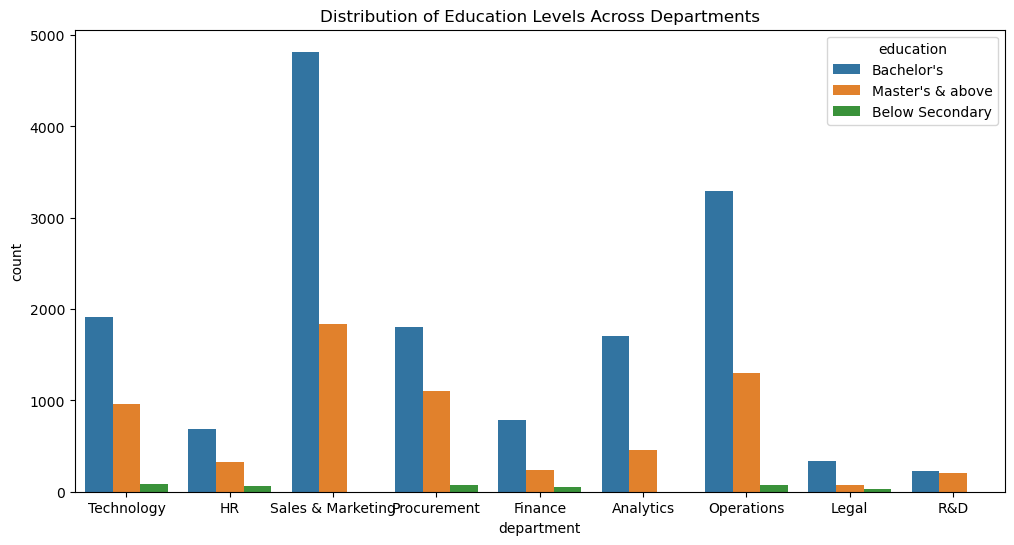

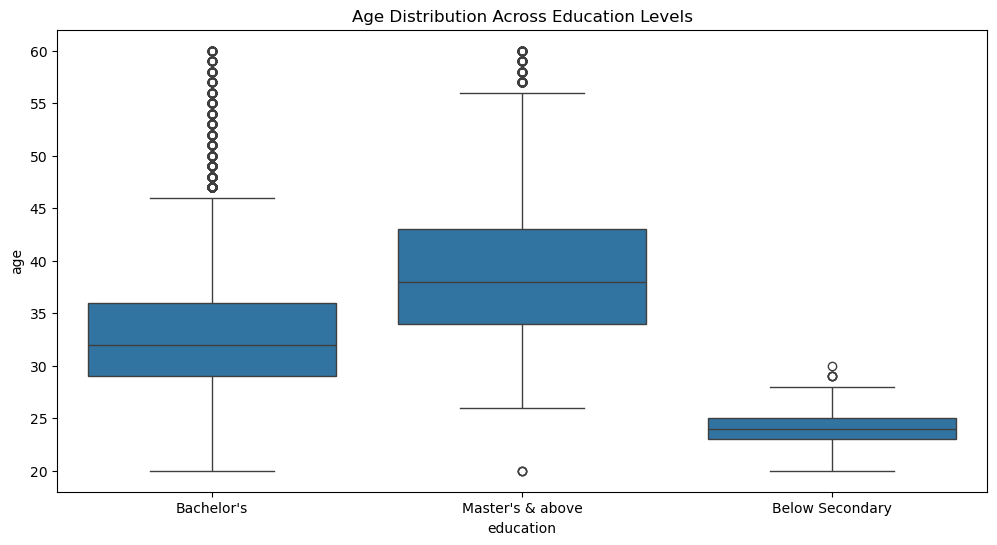

In [8]:
# Department vs. Education
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='department', hue='education')
plt.title('Distribution of Education Levels Across Departments')
plt.show()

# Age vs. Education
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='education', y='age')
plt.title('Age Distribution Across Education Levels')
plt.show()

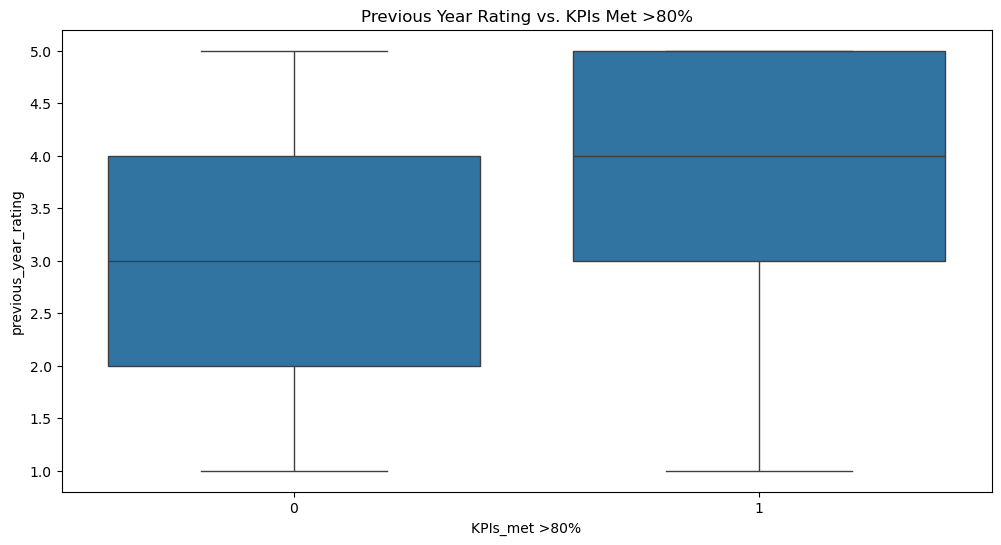

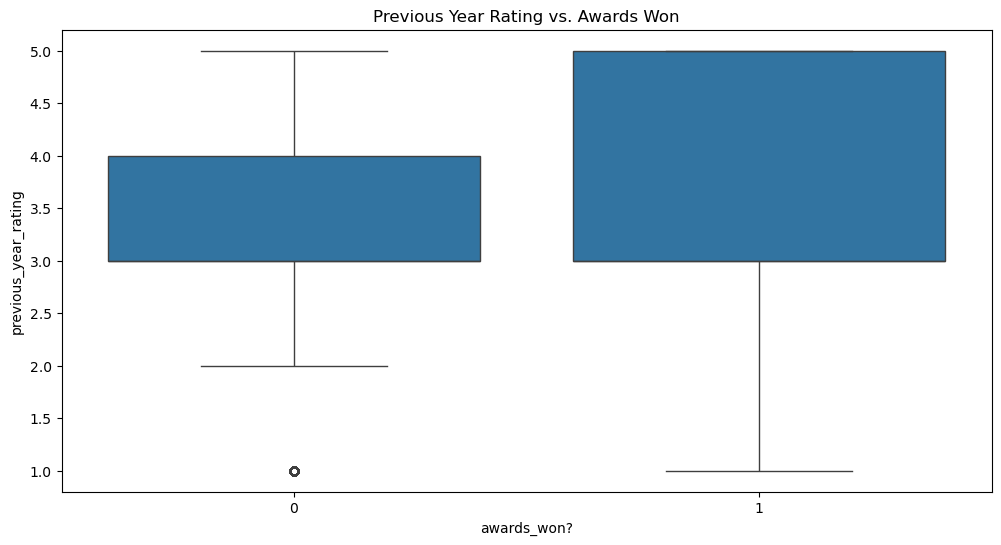

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='KPIs_met >80%', y='previous_year_rating')
plt.title('Previous Year Rating vs. KPIs Met >80%')
plt.show()

# Awards Won vs. Previous Year Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='awards_won?', y='previous_year_rating')
plt.title('Previous Year Rating vs. Awards Won')
plt.show()

In [14]:
data['age_department'] = data['age'].astype(str) + '_' + data['department']

# Fill missing values in 'education' based on the most frequent value in the corresponding 'age_department'
data['education'] = data.groupby('age_department')['education'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

# Create a combined feature of 'awards_won' and 'KPIs_met >80%'
data['awards_kpis'] = data['awards_won?'].astype(str) + '_' + data['KPIs_met >80%'].astype(str)

# Fill missing values in 'previous_year_rating' based on the most frequent value in the corresponding 'awards_kpis'
data['previous_year_rating'] = data.groupby('awards_kpis')['previous_year_rating'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

# Drop the temporary 'awards_kpis' column
data = data.drop(columns=['awards_kpis'])

# Save the processed data
data.to_csv('employee_performance_filled.csv', index=False)

In [16]:
nan_counts = data.isnull().sum()

nan_counts

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
age_department          0
dtype: int64

In [18]:
# Display basic information and check for duplicates
data.info()
print("Number of duplicate rows:", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
 13  age_department        23490 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 2.5+ MB
Number of dup

In [20]:
# Check data types
data.dtypes.describe()

count        14
unique        3
top       int64
freq          7
dtype: object

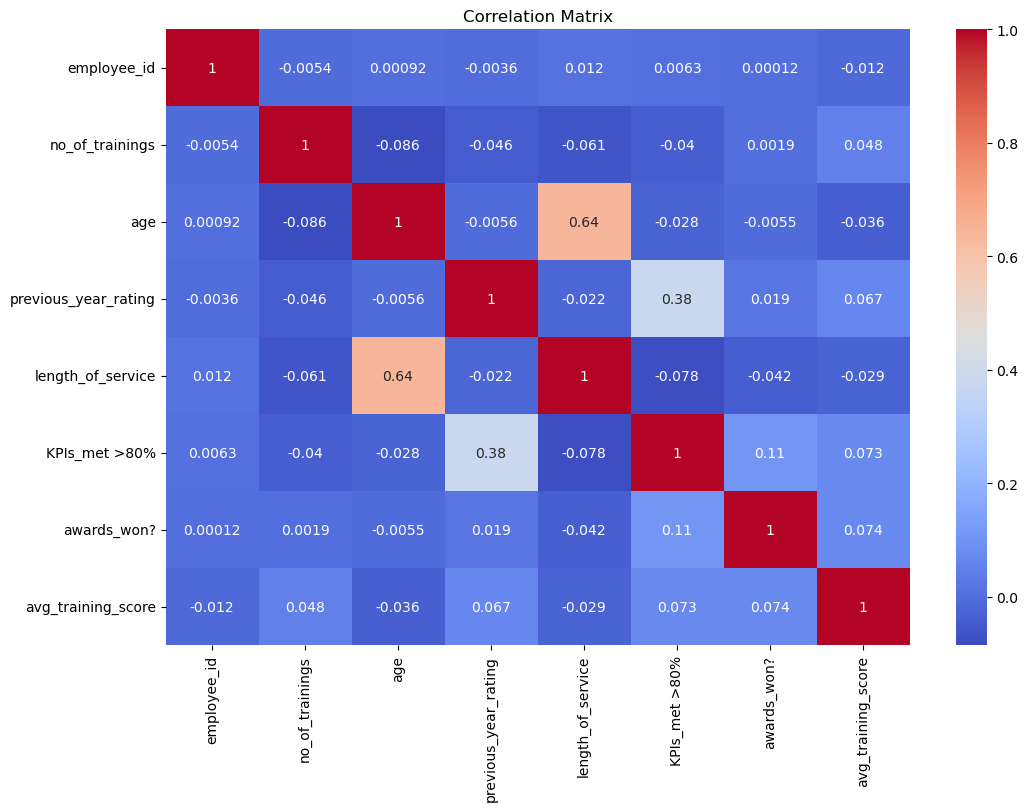

In [24]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature scaling
scaler = StandardScaler()
scaled_columns = ['age', 'length_of_service', 'avg_training_score']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Display the processed data
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_department
0,8724,8,18,0,1,2,1,-1.404150,5.0,-1.143200,1,0,1.024263,24_Technology
1,74430,2,28,0,0,0,1,-0.492612,3.0,-0.192590,0,0,-0.914377,31_HR
2,72255,7,4,0,1,0,1,-0.492612,1.0,-0.430243,0,0,-1.212629,31_Sales & Marketing
3,38562,5,11,0,0,0,3,-0.492612,2.0,0.758019,0,0,0.129506,31_Procurement
4,64486,1,21,0,1,2,1,-0.622832,4.0,0.282714,0,0,-0.168746,30_Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,2,1,-1.404150,3.0,-1.143200,0,0,-0.168746,24_Legal
23486,25600,8,17,0,1,2,1,-0.492612,3.0,0.282714,0,0,0.800574,31_Technology
23487,45409,2,7,0,0,2,1,-1.143711,4.0,-0.430243,0,0,-0.988940,26_HR
23488,1186,5,24,0,1,2,3,-1.013491,3.0,-1.143200,0,0,0.502321,27_Procurement


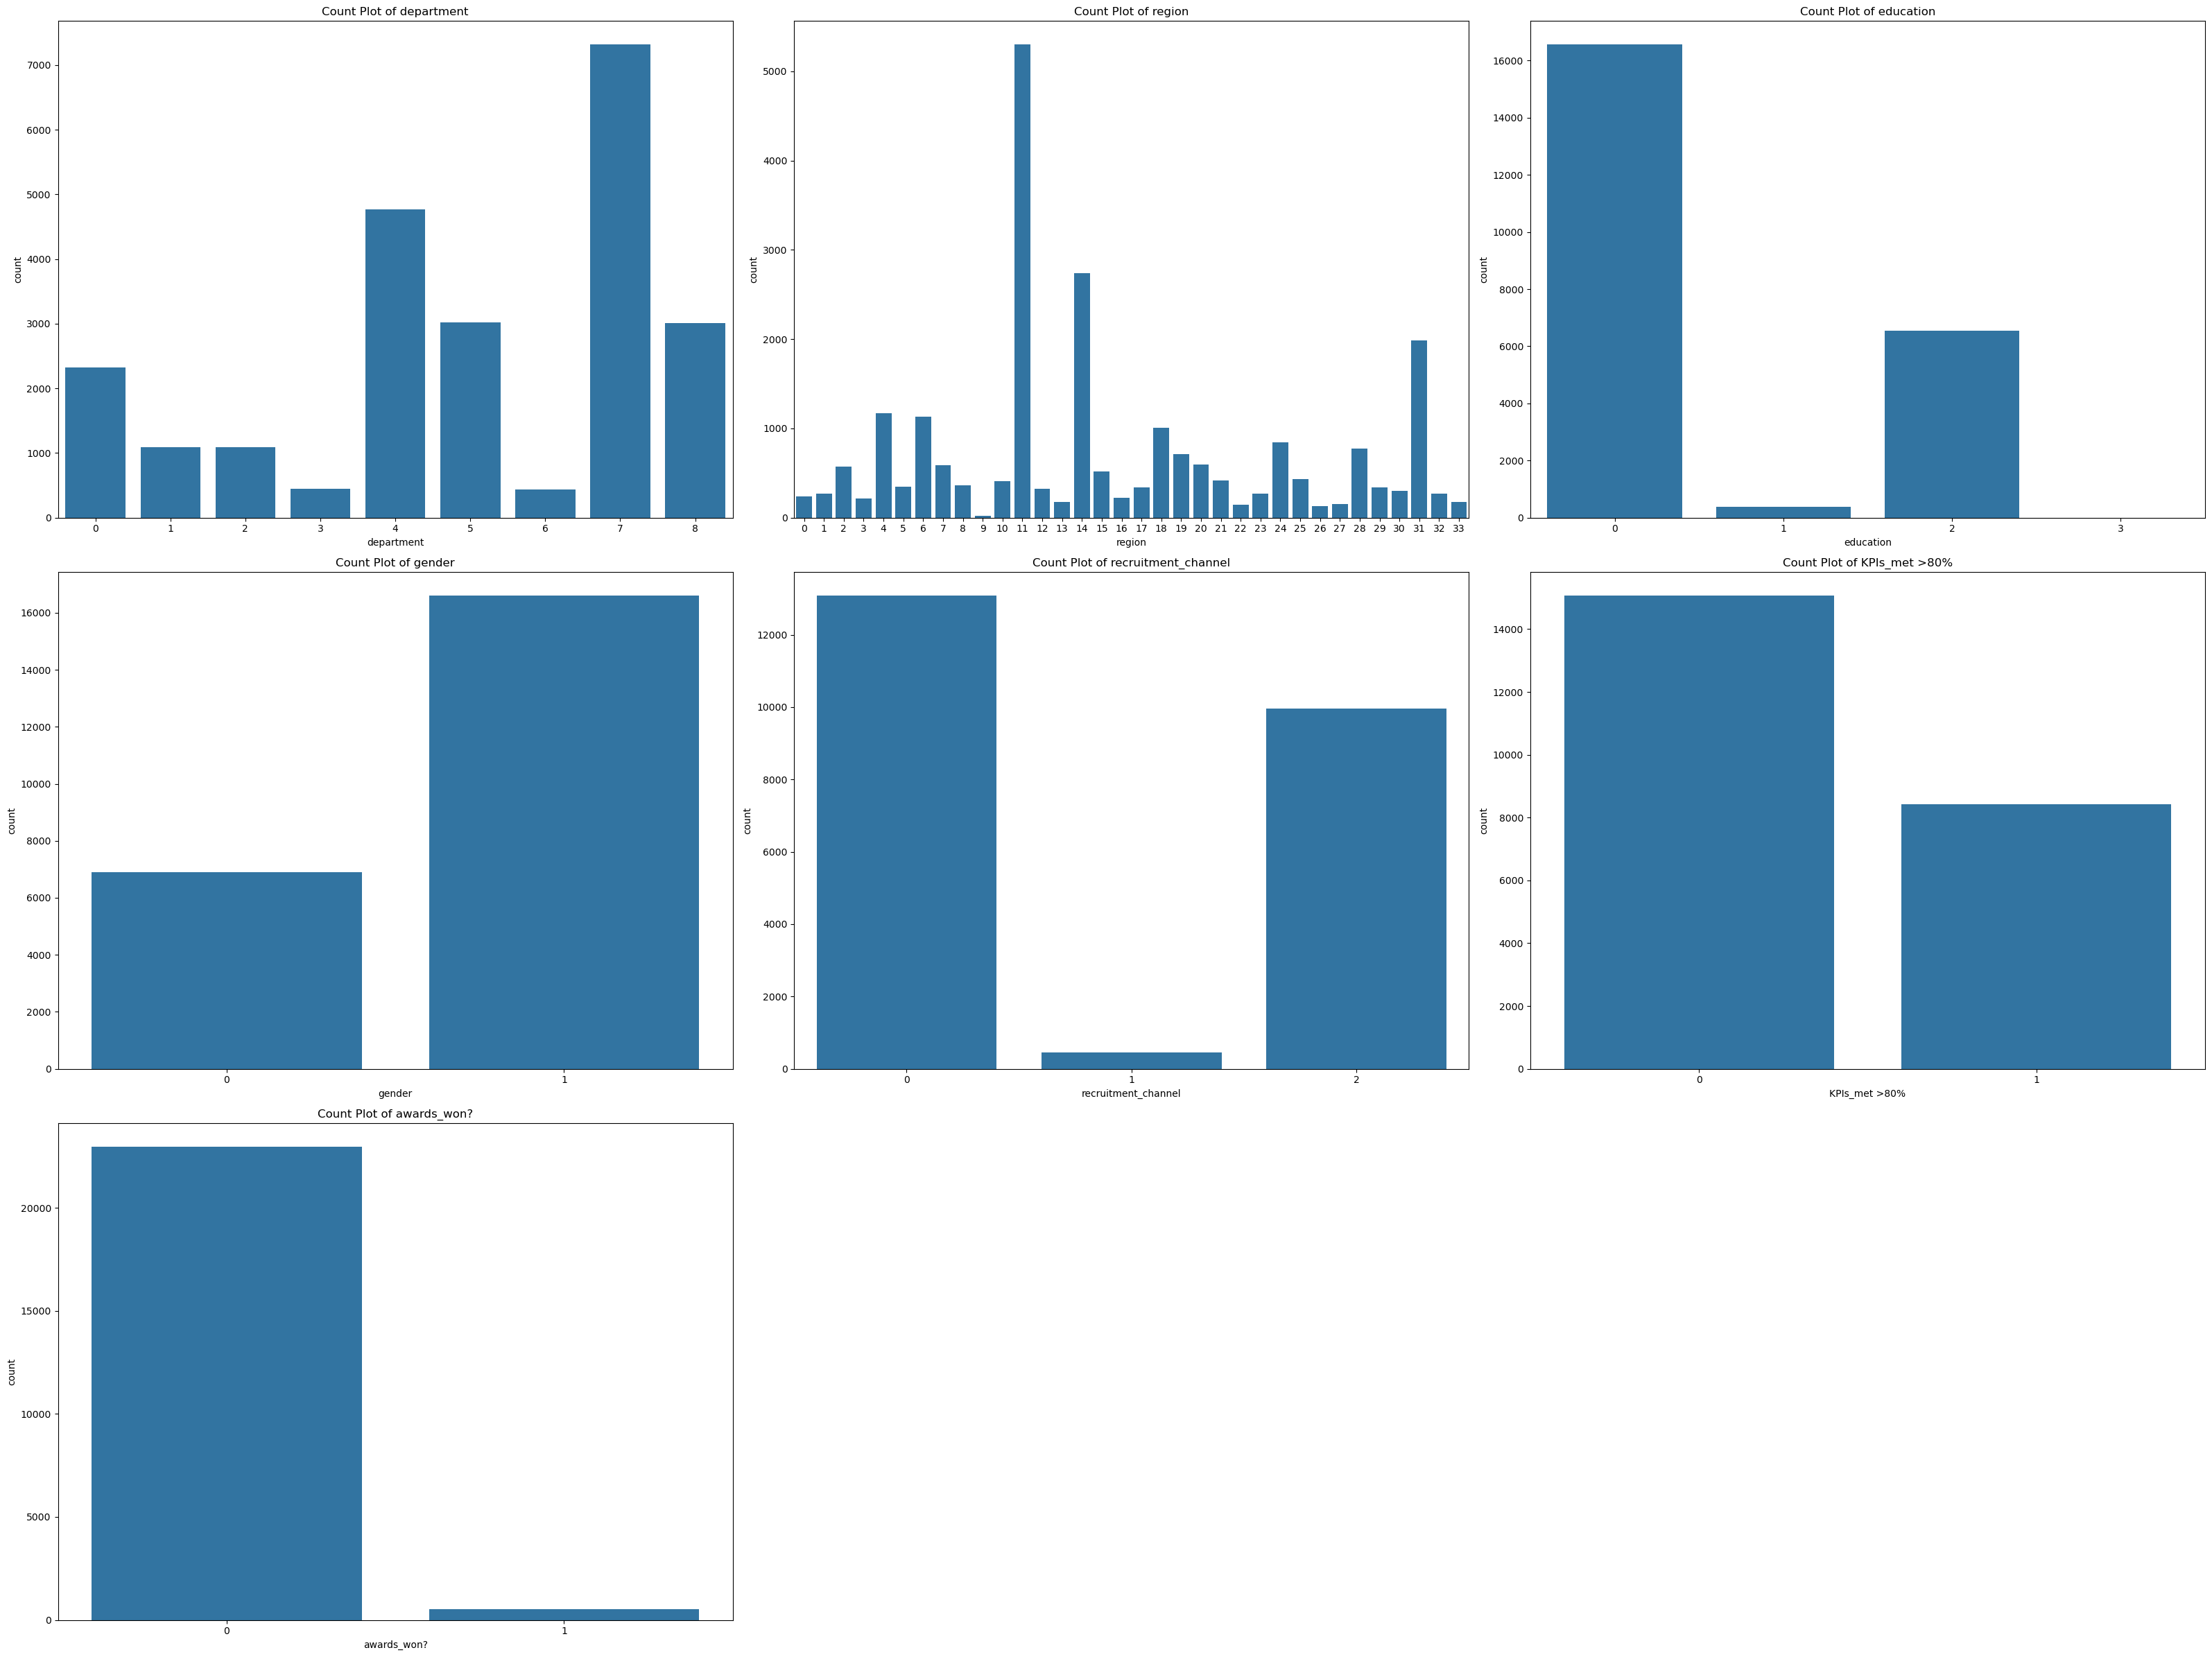

In [28]:
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?']

# Plot count plots for each categorical column
plt.figure(figsize=(32, 24))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Count Plot of {column}')

plt.tight_layout()
plt.show()